In [ ]:
import pandas as pd

# loading the cmos responses from participants, dataset!
file_path = "/content/cmos_responses.csv"
cmosData = pd.read_csv(
        file_path,
        encoding='utf-8',
        engine='python',
        on_bad_lines='warn'
    )

print("First few rows of CMOS responses dataset:")
print(cmosData.head())

    # the mean & std for all columns except name of the 'Participant's
mean_cmos = cmosData.drop(columns=['Participant']).mean()
std_cmos = cmosData.drop(columns=['Participant']).std()

print("\n The Mean CMOS value for each TTS pairs of Human reference speech and Synthesized speech output:")
print("\n") # just for new line
print(mean_cmos)
print("\n The Standard deviation each TTS pairs of Human reference speech and Synthesized speech output:")
print("\n") # just for a another new line
print(std_cmos)

    # saving the results to a new CSV for bachelor thesis reporting :)
results = pd.DataFrame({
        'SamplePair': mean_cmos.index,
        'Mean_CMOS': mean_cmos.values,
        'Std_CMOS': std_cmos.values
    })
results.to_csv('cmos_results_summary.csv', index=False, encoding='utf-8')
print("\n") # just for same again another new line, just for better showcasing the results ;)
print("\n The Results saved to cmos_results_summary.csv") # for checking


First few rows of CMOS responses dataset:
       Participant  HumanReferenceAudio_vs_eSpeakAudio  \
0       Jayaprabha                                   1   
1        Shanmugam                                   0   
2           Sahana                                  -1   
3  Mangaiyarkarasi                                  -1   
4          Papathi                                  -1   

   HumanReferenceAudio_vs_MetaMMSAudio  HumanReferenceAudio_vs_gTTSAudio  \
0                                   -2                                 3   
1                                   -1                                 2   
2                                   -1                                 2   
3                                    0                                 2   
4                                    0                                 3   

   HumanReferenceAudio_vs_IndicTTSAudio  HumanReferenceAudio_vs_BhashiniAudio  \
0                                     1                                

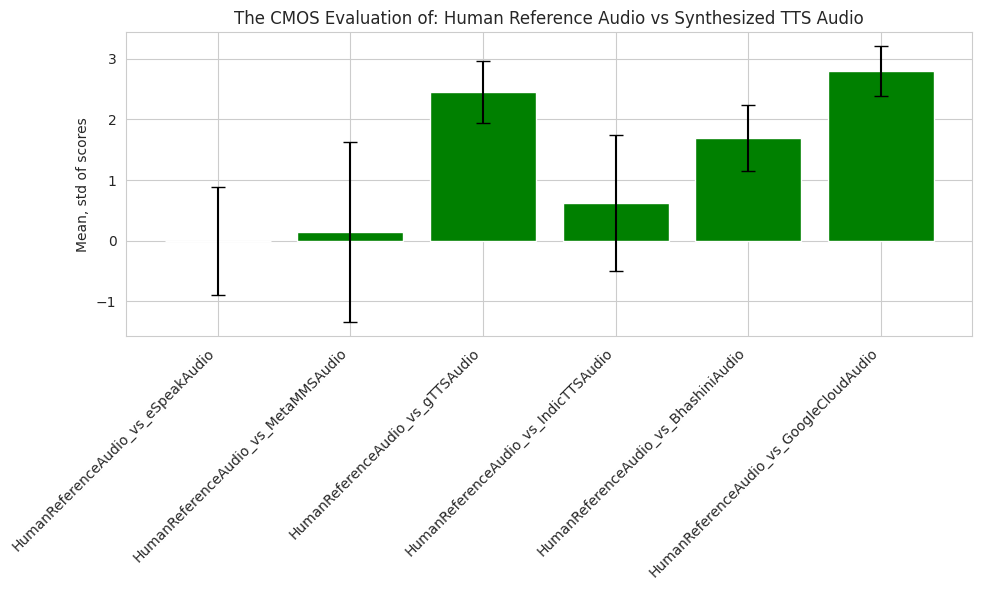

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

cmosData = pd.read_csv("/content/cmos_responses.csv", encoding='utf-8-sig', engine='python', on_bad_lines='warn')

tts_columns = cmosData.columns[1:]

# the mean and standard deviation
mean_cmos = cmosData[tts_columns].mean()
std_cmos = cmosData[tts_columns].std()

# showing the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(tts_columns)), mean_cmos.values, yerr=std_cmos.values, capsize=5, color='green')
plt.xticks(range(len(tts_columns)), tts_columns, rotation=45, ha='right')
plt.ylabel("Mean, std of scores")
plt.title("The CMOS Evaluation of: Human Reference Audio vs Synthesized TTS Audio")
plt.tight_layout()
plt.show()


 The Rows of CMOS summary dataset:


                                SamplePair  Mean_CMOS  Std_CMOS
0       HumanReferenceAudio_vs_eSpeakAudio   0.000000  0.886405
1      HumanReferenceAudio_vs_MetaMMSAudio   0.137931  1.481412
2         HumanReferenceAudio_vs_gTTSAudio   2.448276  0.506120
3     HumanReferenceAudio_vs_IndicTTSAudio   0.620690  1.115277
4     HumanReferenceAudio_vs_BhashiniAudio   1.689655  0.541390
5  HumanReferenceAudio_vs_GoogleCloudAudio   2.793103  0.412251




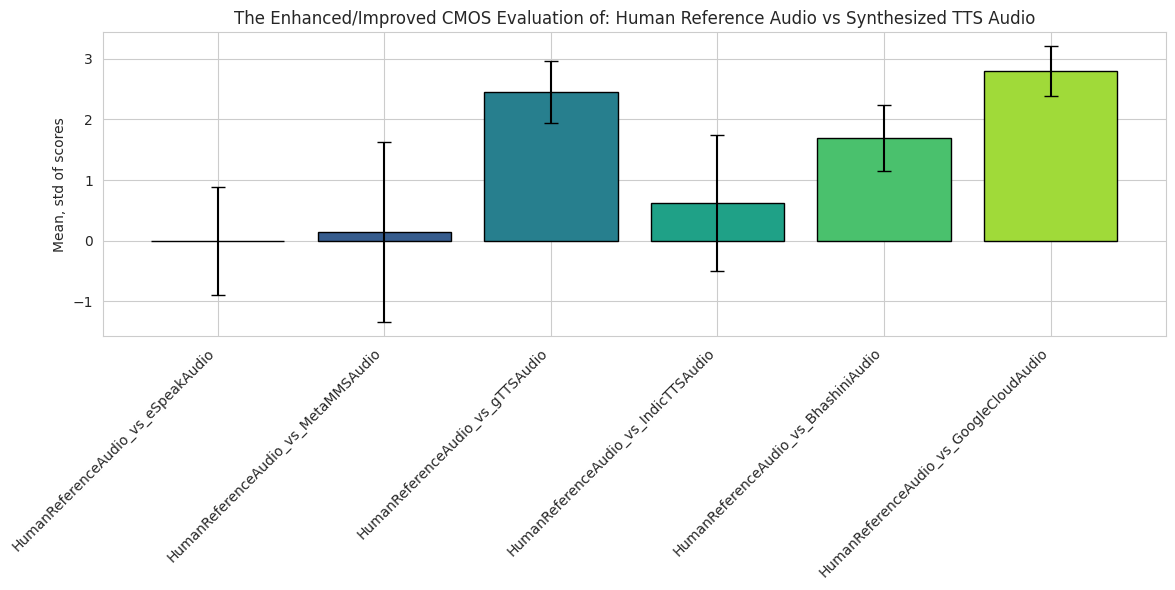

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# CMOS summary dataset
cmos_results = "/content/cmos_results_summary.csv"
cmosData = pd.read_csv(
        cmos_results,
        encoding='utf-8',
        engine='python',
        on_bad_lines='warn'  # Warn on bad lines instead of crashing
    )

mean_cmos = np.array(cmosData['Mean_CMOS'], dtype=float)
std_cmos = np.array(cmosData['Std_CMOS'], dtype=float)
sample_pairs = cmosData['SamplePair']

print(" The Rows of CMOS summary dataset:")
print("\n")
print(cmosData)
print("\n")

plt.figure(figsize=(12, 6))
plt.bar(
        x=sample_pairs,
        height=mean_cmos,
        yerr=std_cmos,
        capsize=5,
        color=sns.color_palette("viridis", len(sample_pairs)),
        edgecolor='black'
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean, std of scores")
plt.title("The Enhanced/Improved CMOS Evaluation of: Human Reference Audio vs Synthesized TTS Audio")
plt.tight_layout()
plt.savefig('cmos_plot.png', dpi=300, bbox_inches='tight')  # save plot for bachelor thesis
plt.show()